In [4]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/connectivity_matrices/',p[i]+'/tracto_op_2_Lest/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
data1mod = []
data2mod = []
data1ge = []
data2ge = []
data1cpl = []
data2cpl = []
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__tot_commit2_weights.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__tot_commit2_weights.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)
                
    data1mod.append(mod)
    data2mod.append(mod1)
    data1ge.append(gb)
    data2ge.append(gb1)
    data1cpl.append(cpl)
    data2cpl.append(cpl1)
    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()

In [ ]:
Ldata2mod

In [ ]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    std       = np.nanstd([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)  * 100                # Mean of the difference
    return cov

In [ ]:
Lcov_mod = cov_cal(data1mod,data2mod)
Lcov_ge = cov_cal(data1ge,data2ge)
Lcov_cpl = cov_cal(data1cpl,data2cpl)

In [2]:
def diff_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    diff      = np.abs(data1 - data2)
    return diff

In [5]:
Ldiff_mod = diff_cal(data1mod,data2mod)
Ldiff_ge = diff_cal(data1ge,data2ge)
Ldiff_cpl = diff_cal(data1cpl,data2cpl)

In [ ]:
Ldiff_mod

In [ ]:
pe1_mod = []
for i in all_mod:
    pe1_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe1_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe1_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )
pe2_mod = []
for i in all_mod:
    pe2_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe2_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe2_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )    

In [ ]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/length_stats.json',p[i]+'/tracto_op_2_Lest/stats_json/length_stats.json']
    d[i] = a

Lallcov_len = []
for i in d:

    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0] 
    k1 = list(data1.keys())[0]
    if k == k1: 
        
        v = list(data[k].values()) # get the value of the subj dict
        v1 = list(data1[k1].values())

    
        if len(v) == len(v1): # if the number of bundles generated is same
            cov_list = []
            for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
                vlen = (v[j]['mean_length'])
                vlen1 = (v1[j]['mean_length'])
                mean = np.mean([vlen, vlen1], axis=0)
                std = np.std([vlen, vlen1], axis=0)
                cov = (std / mean) * 100
                cov_list.append(cov)
            mean_cov = np.mean(cov_list)
        else:
            mean_cov = np.nan
            

    Lallcov_len.append(mean_cov)
#     all_len[i] = [mean, mean1]

In [ ]:
Lallcov_len

In [ ]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/volumes.json',p[i]+'/tracto_op_2_Lest/stats_json/volumes.json']
    d[i] = a

Lallcov_vol = []

for i in d:
    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0]
    k1 = list(data1.keys())[0]
    if k == k1:
        v = list(data[k].values())
        v1 = list(data1[k1].values())
        
        if len(v) == len(v1): # if the number of bundles generated is same
            cov_list = []
            for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
                vol = (v[j]['volume'])
                vol1 = (v1[j]['volume'])
                mean = np.mean([vol, vol1], axis=0)
                std = np.std([vol, vol1], axis=0)
                cov = (std / mean) * 100
                cov_list.append(cov)
            mean_cov = np.mean(cov_list)
        else:
            mean_cov = np.nan
            

    Lallcov_vol.append(mean_cov)

In [6]:
import pandas as pd
df1 = pd.DataFrame(diff_mod).assign(x='Without L(r)').dropna()
df2 = pd.DataFrame(Ldiff_mod).assign(x='With L(r)').dropna()

df3 = pd.DataFrame(diff_ge).assign(x='Without L(r)').dropna()
df4 = pd.DataFrame(Ldiff_ge).assign(x='With L(r)').dropna()

df5 = pd.DataFrame(diff_cpl).assign(x='Without L(r)').dropna()
df6 = pd.DataFrame(Ldiff_cpl).assign(x='With L(r)').dropna()

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [ ]:
import pandas as pd
df1 = pd.DataFrame(cov_mod).assign(x='Without L(r)').dropna()
df2 = pd.DataFrame(Lcov_mod).assign(x='With L(r)').dropna()

df3 = pd.DataFrame(cov_ge).assign(x='Without L(r)').dropna()
df4 = pd.DataFrame(Lcov_ge).assign(x='With L(r)').dropna()

df5 = pd.DataFrame(cov_cpl).assign(x='Without L(r)').dropna()
df6 = pd.DataFrame(Lcov_cpl).assign(x='With L(r)').dropna()

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [16]:
df1

,0,x
0,0.019541,Without L(r)
1,0.000668,Without L(r)
2,0.009220,Without L(r)
3,0.007380,Without L(r)
4,0.014504,Without L(r)
...,...,...
113,0.006394,Without L(r)
114,0.011821,Without L(r)
115,0.001651,Without L(r)
116,0.001025,Without L(r)


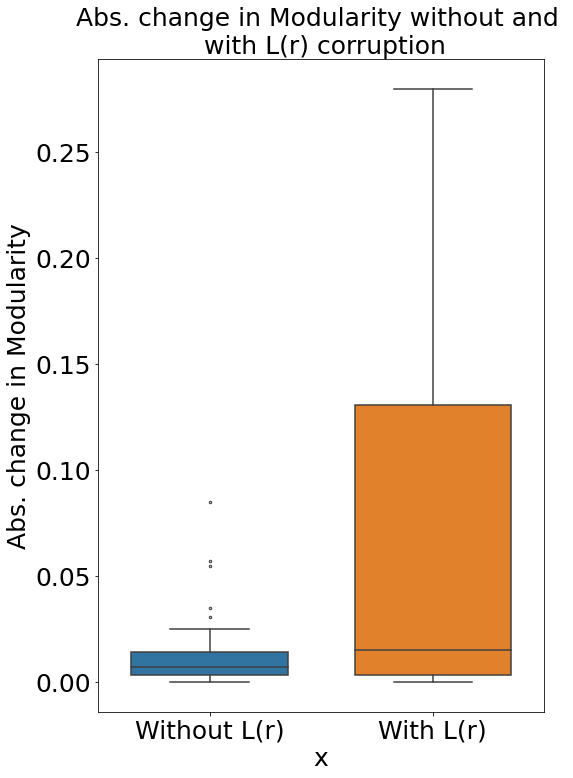

In [8]:
import seaborn as sns
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfmod,flierprops=flierprops, width=0.7 )
plt.title('Abs. change in Modularity without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Abs. change in Modularity',fontsize = 25)
plt.rcParams.update({'font.size':25})

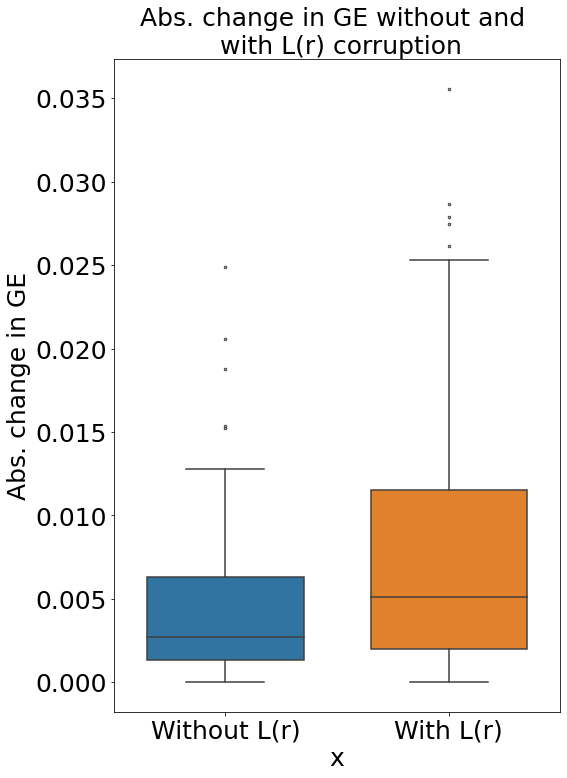

In [9]:
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfge,flierprops=flierprops, width=0.7 )
plt.title('Abs. change in GE without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Abs. change in GE',fontsize = 25)
plt.rcParams.update({'font.size':25})

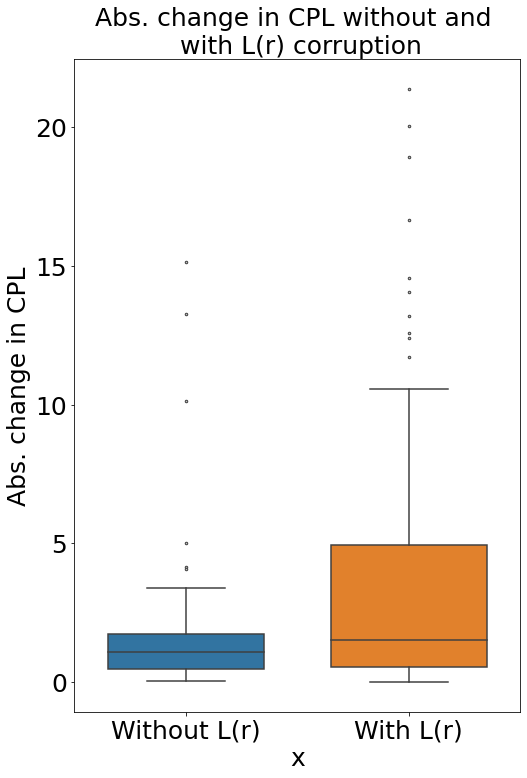

In [10]:
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfcpl,flierprops=flierprops, width=0.7 )
plt.title('Abs. change in CPL without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Abs. change in CPL',fontsize = 25)
plt.rcParams.update({'font.size':25})

In [19]:
from scipy import stats
sdf1 = pd.DataFrame(diff_mod).assign(x='Without L(r)')
sdf2 = pd.DataFrame(Ldiff_mod).assign(x='With L(r)')

sdf3 = pd.DataFrame(diff_ge).assign(x='Without L(r)')
sdf4 = pd.DataFrame(Ldiff_ge).assign(x='With L(r)')

sdf5 = pd.DataFrame(diff_cpl).assign(x='Without L(r)')
sdf6 = pd.DataFrame(Ldiff_cpl).assign(x='With L(r)')

pmod = stats.wilcoxon(sdf1[0], sdf2[0])
pge = stats.wilcoxon(sdf3[0], sdf4[0])
pcpl = stats.wilcoxon(sdf5[0], sdf6[0])

In [23]:
print(pmod,pge,pcpl)
praw = [pmod.pvalue,pge.pvalue,pcpl.pvalue]

WilcoxonResult(statistic=1479.0, pvalue=4.883789007129706e-08) WilcoxonResult(statistic=2009.0, pvalue=5.5256617248754625e-05) WilcoxonResult(statistic=1797.0, pvalue=4.19424033168447e-06)


In [24]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(praw, alpha=0.005,method='bonferroni')
p_adjusted

(array([ True,  True,  True]),
 array([1.46513670e-07, 1.65769852e-04, 1.25827210e-05]),
 0.0016694521863086509,
 0.0016666666666666668)

In [12]:
def cohend(c0,c1):
    cohens_d = (np.nanmean(c0) - np.nanmean(c1)) / (np.sqrt((np.nanstd(c0) ** 2 + np.nanstd(c1) ** 2) / 2))
    return cohens_d

In [13]:
dmod = cohend(df1[0], df2[0])
dge = cohend(df3[0], df4[0])
dcpl = cohend(df5[0], df6[0])
print(dmod,dge,dcpl)

-0.9426308866881632 -0.5505900326447798 -0.5820925797712337
